In [ ]:
import io
import os
from typing import Dict

import boto3
import matplotlib.pyplot as plt
import pandas as pd


def load_parquets(bucket: str, prefix: str) -> Dict[str, pd.DataFrame]:
    s3 = boto3.client("s3")
    result = {}

    if not prefix.endswith("/"):
        prefix = prefix + "/"

    paginator = s3.get_paginator("list_objects_v2")
    pages = paginator.paginate(Bucket=bucket, Prefix=prefix)

    keys = []
    for page in pages:
        for obj in page.get("Contents", []):
            key = obj["Key"]
            if key.endswith(".parquet"):
                keys.append(key)

    for key in keys:
        filename = key.split("/")[-1]
        name = filename.rsplit(".", 1)[0]

        buf = io.BytesIO()
        s3.download_fileobj(bucket, key, buf)
        buf.seek(0)

        df = pd.read_parquet(buf)

        if "timestamp_ms" in df.columns:
            df["datetime"] = pd.to_datetime(df["timestamp_ms"], unit="ms")
            df = df.drop(columns=["timestamp_ms"])
            df = df.set_index("datetime")

        result[name] = df

    return result


bucket = os.getenv("S3_BUCKET")
prefix = "sports/EPL/team=tottenham/year=2025/month=12/day=06/2025-12-06T15:00:00Z/Yes/"

dataset = load_parquets(bucket, prefix)
dataset.keys()

In [4]:
for i in dataset.keys():
    print("data name:", i)
    print("columns:", dataset[i].columns.values)
    print("")

data name: book
columns: ['asset_id' 'market' 'hash' 'bids' 'asks']

data name: last_trade_price
columns: ['asset_id' 'market' 'price' 'size' 'side' 'fee_rate_bps' 'hash']

data name: price_change
columns: ['asset_id' 'market' 'price' 'size' 'side' 'hash' 'best_bid' 'best_ask']

data name: tick_size_change
columns: ['asset_id' 'market' 'old_tick_size' 'new_tick_size' 'hash']



In [5]:
dataset["book"].head()

,asset_id,market,hash,bids,asks
datetime,,,,,
2025-12-04 18:30:33.155,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,c14aae6ec6368495687fff813a251d071a891024,"[{""price"": ""0.01"", ""size"": ""512""}, {""price"": ""...","[{""price"": ""0.99"", ""size"": ""520.2""}, {""price"":..."
2025-12-04 18:41:10.832,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,81450ebac5040481e1c70353497b77e45454897a,"[{""price"": ""0.01"", ""size"": ""512""}, {""price"": ""...","[{""price"": ""0.99"", ""size"": ""520.2""}, {""price"":..."
2025-12-04 18:48:14.285,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,47c23f1f4d8d82ed0a7b4ac776a99d8a27c93068,"[{""price"": ""0.01"", ""size"": ""512""}, {""price"": ""...","[{""price"": ""0.99"", ""size"": ""520.2""}, {""price"":..."
2025-12-04 18:51:23.929,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,65c0ef2ed009438e835608df538fe74dd4c11fc2,"[{""price"": ""0.01"", ""size"": ""512""}, {""price"": ""...","[{""price"": ""0.99"", ""size"": ""520.2""}, {""price"":..."
2025-12-04 18:57:09.955,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,1ed1d375ccbc98729bd1050445aafa94fd49fa25,"[{""price"": ""0.01"", ""size"": ""512""}, {""price"": ""...","[{""price"": ""0.99"", ""size"": ""520.2""}, {""price"":..."


In [6]:
dataset["last_trade_price"]

,asset_id,market,price,size,side,fee_rate_bps,hash
datetime,,,,,,,
2025-12-04 19:32:09.357,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.42,2.380951,BUY,0,None
2025-12-04 19:57:49.001,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.42,2.380951,BUY,0,None
2025-12-04 20:30:21.580,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.43,34.935347,BUY,0,None
2025-12-04 21:38:35.129,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.42,11.90476,BUY,0,None
2025-12-04 21:52:19.321,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.42,7.142856,BUY,0,None
...,...,...,...,...,...,...,...
2025-12-06 19:38:03.033,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.999,108.69,SELL,0,None
2025-12-06 19:44:16.034,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.999,225,SELL,0,None
2025-12-06 19:54:43.031,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.999,5.1,SELL,0,None


In [7]:
dataset["price_change"]

,asset_id,market,price,size,side,hash,best_bid,best_ask
datetime,,,,,,,,
2025-12-04 18:32:04.278,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.43,57926.85,SELL,5d9c9cb14a96ac5fe80565665fc875f23ac512f5,0.41,0.42
2025-12-04 18:32:04.587,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.43,58582.85,SELL,1a509f0cc68d47aa4b124f305b8c999ff037e4d8,0.41,0.42
2025-12-04 18:32:58.000,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.47,670,SELL,91ed88fa379d39712888b297480e00b0d10c299b,0.41,0.42
2025-12-04 18:32:58.001,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.38,70365,BUY,e33c9af713d27caa02dbf2acd4057c0830343f71,0.41,0.42
2025-12-04 18:33:02.272,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.47,820,SELL,cf911ff9844682423bd5cdab5c137426e8696d66,0.41,0.42
...,...,...,...,...,...,...,...,...
2025-12-06 20:07:43.646,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.034,3529,BUY,99cabb2bf61264393371e38c1ac2f596c7c1b9e0,0.999,1
2025-12-06 20:07:52.001,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.034,0,BUY,924ebb04de4a001741e6943bc81656429224a799,0.999,1
2025-12-06 20:07:53.503,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.034,3529,BUY,69c0cae439199564b03c95188fde0e17ab3a87e4,0.999,1


In [8]:
dataset["tick_size_change"]

,asset_id,market,old_tick_size,new_tick_size,hash
datetime,,,,,
2025-12-06 16:40:34.039,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.01,0.001,None
2025-12-06 16:40:34.039,7470463700635339962262114455919719125962330668...,0xea5fb474ae0644b5dc1566e2f19c13fa31f7c5bb3d1c...,0.001,0.001,None


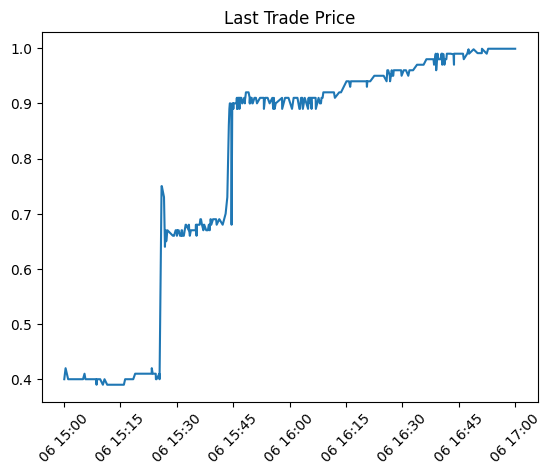

In [13]:
plt.title("Last Trade Price")
plt.plot(
    dataset["last_trade_price"]["price"].astype(float)["2025-12-06 15:00:00":"2025-12-06 17:00:00"]
)
plt.xticks(rotation=45)
plt.show()

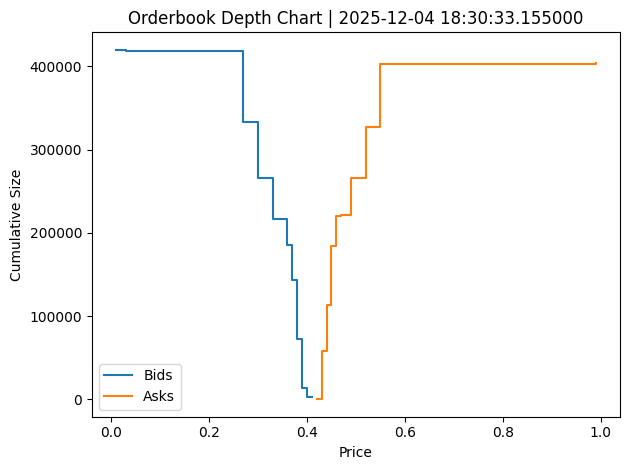

In [14]:
def plot_orderbook_depth(book_df, i: int = 0):
    asks = json.loads(book_df["asks"].iloc[i])
    bids = json.loads(book_df["bids"].iloc[i])

    ask_prices = [float(d["price"]) for d in asks]
    ask_sizes = [float(d["size"]) for d in asks]

    bid_prices = [float(d["price"]) for d in bids]
    bid_sizes = [float(d["size"]) for d in bids]

    ask_pairs = sorted(zip(ask_prices, ask_sizes), key=lambda x: x[0])
    bid_pairs = sorted(zip(bid_prices, bid_sizes), key=lambda x: x[0], reverse=True)

    ask_prices_sorted = [p for p, s in ask_pairs]
    ask_sizes_sorted = [s for p, s in ask_pairs]

    bid_prices_sorted = [p for p, s in bid_pairs]
    bid_sizes_sorted = [s for p, s in bid_pairs]

    ask_cum = []
    running = 0
    for s in ask_sizes_sorted:
        running += s
        ask_cum.append(running)

    bid_cum = []
    running = 0
    for s in bid_sizes_sorted:
        running += s
        bid_cum.append(running)

    plt.step(bid_prices_sorted, bid_cum, where="post", label="Bids")
    plt.step(ask_prices_sorted, ask_cum, where="post", label="Asks")

    plt.xlabel("Price")
    plt.ylabel("Cumulative Size")
    plt.title(f"Orderbook Depth Chart | {book_df.index[i]}")
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_orderbook_depth(dataset["book"], 0)

In [ ]:
import json

from IPython.display import HTML
from matplotlib.animation import FuncAnimation


def draw_orderbook_depth(book_df, i, ax):
    asks = json.loads(book_df["asks"].iloc[i])
    bids = json.loads(book_df["bids"].iloc[i])

    ask_prices = [float(d["price"]) for d in asks]
    ask_sizes = [float(d["size"]) for d in asks]
    bid_prices = [float(d["price"]) for d in bids]
    bid_sizes = [float(d["size"]) for d in bids]

    ask_pairs = sorted(zip(ask_prices, ask_sizes), key=lambda x: x[0])
    bid_pairs = sorted(zip(bid_prices, bid_sizes), key=lambda x: x[0], reverse=True)

    ask_prices_sorted = [p for p, s in ask_pairs]
    ask_sizes_sorted = [s for p, s in ask_pairs]
    bid_prices_sorted = [p for p, s in bid_pairs]
    bid_sizes_sorted = [s for p, s in bid_pairs]

    ask_cum = []
    running = 0
    for s in ask_sizes_sorted:
        running += s
        ask_cum.append(running)

    bid_cum = []
    running = 0
    for s in bid_sizes_sorted:
        running += s
        bid_cum.append(running)

    ax.cla()
    ax.step(bid_prices_sorted, bid_cum, where="post", label="Bids")
    ax.step(ask_prices_sorted, ask_cum, where="post", label="Asks")
    ax.set_xlabel("Price")
    ax.set_ylabel("Cumulative Size")
    ax.set_title(f"Orderbook Depth Chart | {book_df.index[i]}")
    ax.legend(loc="upper center")


book_df = dataset["book"]
fig, ax = plt.subplots()

step = 20
frames = range(0, len(book_df), step)


def update(frame_idx):
    draw_orderbook_depth(book_df, frame_idx, ax)


ani = FuncAnimation(fig, update, frames=frames, interval=100, repeat=True)

html = ani.to_jshtml()
plt.close(fig)
HTML(html)